# Mapping of Los Angeles Citation Violation Data with GeoPandas

In [1]:
# Import data science packages
import pandas as pd
import numpy as np
import datetime

# Import visualization and geoanalytics packages
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point
from shapely.geometry import box
import pyproj

In [2]:
dg = pd.read_csv('LADOT_Metered_Parking_Inventory___Policies.csv')
dg.columns

Index(['SpaceID', 'BlockFace', 'MeterType', 'RateType', 'RateRange',
       'MeteredTimeLimit', 'ParkingPolicy', 'StreetCleaning', 'LatLng'],
      dtype='object')

In [3]:
dg.head()

SpaceID         BlockFace     MeterType RateType RateRange MeteredTimeLimit  \
0   WU150      501 UNION DR  Single-Space     FLAT     $1.00              2HR   
1   MV161   12200 VENICE BL  Single-Space     FLAT     $1.00              2HR   
2   ER138  2000 COLORADO BL  Single-Space     FLAT     $1.00              2HR   
3    BF66   7901 BEVERLY BL  Single-Space     FLAT     $1.00              2HR   
4   CB121    1301 S HOPE ST  Single-Space      TOD   $1 - $2              4HR   

               ParkingPolicy StreetCleaning                    LatLng  
0              8A-6P Mon-Sat     12P-3P Mon  (34.057219, -118.268751)  
1              8A-8P Mon-Sat            NaN    (34.0043, -118.432007)  
2              8A-8P Mon-Sat            NaN  (34.139067, -118.210994)  
3  8A-8P Mon-Sat, 11A-8P Sun            NaN  (34.076203, -118.362266)  
4              8A-8P Mon-Sat            NaN   (34.038863, -118.26618)

In [4]:
dg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33989 entries, 0 to 33988
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   SpaceID           33989 non-null  object
 1   BlockFace         33989 non-null  object
 2   MeterType         33989 non-null  object
 3   RateType          33989 non-null  object
 4   RateRange         33989 non-null  object
 5   MeteredTimeLimit  33989 non-null  object
 6   ParkingPolicy     33989 non-null  object
 7   StreetCleaning    9614 non-null   object
 8   LatLng            33989 non-null  object
dtypes: object(9)
memory usage: 2.3+ MB


In [5]:
df = pd.read_csv('Original_data/Parking_Citations_After_July_1_2015.csv', usecols = 
                 ['Issue Date', 'Issue time', 'Meter Id', 'Location', 'Violation Description', 'Latitude', 'Longitude'])

In [6]:
df.columns = ['Issue_Date', 'Issue_Time', 'Meter ID','Location', 'Violation_Description', 'Latitude', 'Longitude']

In [7]:
df.describe()

Issue_Time      Latitude     Longitude
count  8.704245e+06  8.706410e+06  8.706410e+06
mean   1.191125e+03  5.626516e+06  1.620590e+06
std    4.753554e+02  2.140816e+06  5.896023e+05
min    0.000000e+00  9.999900e+04  9.999900e+04
25%    9.050000e+02  6.423748e+06  1.826133e+06
50%    1.147000e+03  6.453452e+06  1.842363e+06
75%    1.457000e+03  6.475619e+06  1.858228e+06
max    2.359000e+03  6.514332e+06  1.942669e+06

In [8]:
df.head()

Issue_Date  Issue_Time Meter ID          Location  \
0  2019/09/17 12:00:00 AM       817.0      NaN    1324 84TH PL W   
1  2019/09/17 12:00:00 AM       811.0     VM48    1000 85TH ST W   
2  2019/09/17 12:00:00 AM       809.0      NaN    1000 85TH ST W   
3  2019/09/17 12:00:00 AM       805.0      NaN  8021 VERMONT AVE   
4  2019/09/17 12:00:00 AM       727.0      NaN    1473 45TH ST W   

  Violation_Description      Latitude     Longitude  
0  NO PARK/STREET CLEAN  6.471017e+06  1.808559e+06  
1            METER EXP.  6.473192e+06  1.808298e+06  
2  NO PARK/STREET CLEAN  6.473192e+06  1.808298e+06  
3  NO PARK/STREET CLEAN  6.473164e+06  1.810388e+06  
4     BLOCKING DRIVEWAY  6.469917e+06  1.823537e+06

In [11]:
meter_merge = df.merge(dg, how='left', left_on='Meter ID', right_on='SpaceID')
meter_merge.head()

Issue_Date  Issue_Time Meter ID          Location  \
0  2019/09/17 12:00:00 AM       817.0      NaN    1324 84TH PL W   
1  2019/09/17 12:00:00 AM       811.0     VM48    1000 85TH ST W   
2  2019/09/17 12:00:00 AM       809.0      NaN    1000 85TH ST W   
3  2019/09/17 12:00:00 AM       805.0      NaN  8021 VERMONT AVE   
4  2019/09/17 12:00:00 AM       727.0      NaN    1473 45TH ST W   

  Violation_Description      Latitude     Longitude SpaceID     BlockFace  \
0  NO PARK/STREET CLEAN  6.471017e+06  1.808559e+06     NaN           NaN   
1            METER EXP.  6.473192e+06  1.808298e+06    VM48  1000 85TH ST   
2  NO PARK/STREET CLEAN  6.473192e+06  1.808298e+06     NaN           NaN   
3  NO PARK/STREET CLEAN  6.473164e+06  1.810388e+06     NaN           NaN   
4     BLOCKING DRIVEWAY  6.469917e+06  1.823537e+06     NaN           NaN   

      MeterType RateType RateRange MeteredTimeLimit  ParkingPolicy  \
0           NaN      NaN       NaN              NaN            NaN   
1  Single-Space     FLAT     $1.00              4HR  8A-8P Mon-Sat   
2           NaN      NaN       NaN              NaN            NaN   
3           NaN      NaN       NaN              NaN            NaN   
4           NaN      NaN       NaN              NaN            NaN   

  StreetCleaning                  LatLng  
0            NaN                     NaN  
1            NaN  (33.9609, -118.292115)  
2            NaN                     NaN  
3            NaN                     NaN  
4            NaN                     NaN

In [12]:
meter_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8706412 entries, 0 to 8706411
Data columns (total 16 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Issue_Date             object 
 1   Issue_Time             float64
 2   Meter ID               object 
 3   Location               object 
 4   Violation_Description  object 
 5   Latitude               float64
 6   Longitude              float64
 7   SpaceID                object 
 8   BlockFace              object 
 9   MeterType              object 
 10  RateType               object 
 11  RateRange              object 
 12  MeteredTimeLimit       object 
 13  ParkingPolicy          object 
 14  StreetCleaning         object 
 15  LatLng                 object 
dtypes: float64(3), object(13)
memory usage: 1.1+ GB


In [9]:
df.isna().sum()

Issue_Date                     0
Issue_Time                  2167
Meter ID                 6520291
Location                     346
Violation_Description        890
Latitude                       2
Longitude                      2
dtype: int64

In [11]:
df = df.dropna()

In [12]:
len(df)

2185832

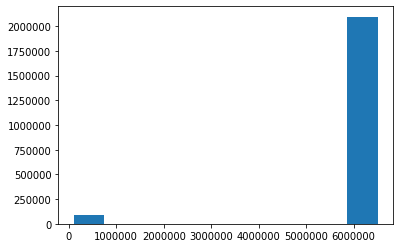

In [13]:
plt.hist(df.Latitude)
plt.show()

In [14]:
df[(df['Latitude'] < 100000)|(df['Longitude'] < 100000)]

Issue_Date  Issue_Time Meter ID              Location  \
68       2019/09/17 12:00:00 AM       537.0      525        945 FLOWER AVE   
77       2019/09/17 12:00:00 AM       207.0      546    11963 LINDBLADE ST   
175      2019/09/17 12:00:00 AM      2246.0        7     6258 DEL VALLE DR   
398      2019/09/17 12:00:00 AM       216.0      275    8001 EL CENTRO AVE   
543      2019/09/17 12:00:00 AM       400.0      560      3903 ORANGE DR S   
...                         ...         ...      ...                   ...   
8705490  2015/07/02 12:00:00 AM      1340.0    ER119  APX 5080 N CASPAR AV   
8705491  2015/07/02 12:00:00 AM      1321.0     ER76   2131 W CHICKASAW AV   
8705492  2015/07/02 12:00:00 AM      1314.0    ER120  APX 5080 N CASPAR AV   
8705493  2015/07/02 12:00:00 AM      1105.0     YO16     APX 1310 N AVE 51   
8705497  2015/07/02 12:00:00 AM       854.0    SA152      1538 W SUNSET BL   

        Violation_Description  Latitude  Longitude  
68       OVNIGHT PRK W/OUT PE   99999.0    99999.0  
77       OVNIGHT PRK W/OUT PE   99999.0    99999.0  
175      PREFERENTIAL PARKING   99999.0    99999.0  
398      PREFERENTIAL PARKING   99999.0    99999.0  
543      OVNIGHT PRK W/OUT PE   99999.0    99999.0  
...                       ...       ...        ...  
8705490         METER EXPIRED   99999.0    99999.0  
8705491         METER EXPIRED   99999.0    99999.0  
8705492         METER EXPIRED   99999.0    99999.0  
8705493         METER EXPIRED   99999.0    99999.0  
8705497         METER EXPIRED   99999.0    99999.0  

[89239 rows x 7 columns]

In [15]:
df = df[(df['Latitude'] > 100000)|(df['Longitude'] > 100000)]

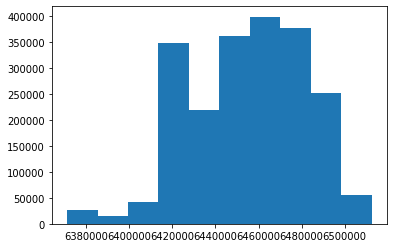

In [16]:
plt.hist(df.Latitude)
plt.show()

In [17]:
# Filter for street cleaning violations
df = df[df['Violation_Description']  == 'NO PARK/STREET CLEAN']
# Fix Issue_Time and add padding zeros so the time can be recognized
def time_padding(time):
    time = str(int(time))
    return '0'*(4-len(time)) + time
# Apply padding to Issue_time
df['Issue_Time'] = df['Issue_Time'].apply(time_padding)
# Creating combined Datetime column
df['Issue_Date'] = df['Issue_Date'].apply(lambda x: x[:10])
df['Datetime'] = pd.to_datetime(df['Issue_Date'] + ' ' + df['Issue_Time'], format='%Y/%m/%d %H%M')
# Create hour feature
df['Hour'] = df['Datetime'].apply(lambda x: x.hour)
#create day of the week
weekdays=('Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday')
df['Weekday'] = df['Datetime'].apply(lambda x : weekdays[x.weekday()])

In [18]:
df.head()

Issue_Date Issue_Time Meter ID              Location  \
13447   2019/09/09       1136   WF430E  N/S 6600 W ORANGE ST   
13448   2019/09/09       1138   WF430D  N/S 6600 W ORANGE ST   
266554  2019/06/24       1132    BF381      600 HAYWORTH AVE   
272851  2019/06/21       1205    VW115   625 S LA FAYETTE PK   
295278  2019/06/18       1052    WF556     6730 W DREXEL AVE   

       Violation_Description      Latitude     Longitude            Datetime  \
13447   NO PARK/STREET CLEAN  6.449234e+06  1.846296e+06 2019-09-09 11:36:00   
13448   NO PARK/STREET CLEAN  6.449234e+06  1.846296e+06 2019-09-09 11:38:00   
266554  NO PARK/STREET CLEAN  6.451851e+06  1.852282e+06 2019-06-24 11:32:00   
272851  NO PARK/STREET CLEAN  6.476017e+06  1.845105e+06 2019-06-21 12:05:00   
295278  NO PARK/STREET CLEAN  6.448337e+06  1.847948e+06 2019-06-18 10:52:00   

        Hour  Weekday  
13447     11   Monday  
13448     11   Monday  
266554    11   Monday  
272851    12   Friday  
295278    10  Tuesday

In [19]:
# Conversion using pyproj module
inProj = pyproj.Proj({'init': 'epsg:2229'}, preserve_units=True) # make sure unit preserve 
outProj = pyproj.Proj({'init': 'epsg:4326'})
y_1,x_1 = pyproj.transform(inProj,outProj,df["Latitude"].values, df["Longitude"].values)

In [20]:
# Add on the converted coordinates
df["Latitude"] = x_1
df["Longitude"] = y_1
df.head()

Issue_Date Issue_Time Meter ID              Location  \
13447   2019/09/09       1136   WF430E  N/S 6600 W ORANGE ST   
13448   2019/09/09       1138   WF430D  N/S 6600 W ORANGE ST   
266554  2019/06/24       1132    BF381      600 HAYWORTH AVE   
272851  2019/06/21       1205    VW115   625 S LA FAYETTE PK   
295278  2019/06/18       1052    WF556     6730 W DREXEL AVE   

       Violation_Description   Latitude   Longitude            Datetime  Hour  \
13447   NO PARK/STREET CLEAN  34.065140 -118.371230 2019-09-09 11:36:00    11   
13448   NO PARK/STREET CLEAN  34.065140 -118.371230 2019-09-09 11:38:00    11   
266554  NO PARK/STREET CLEAN  34.081615 -118.362661 2019-06-24 11:32:00    11   
272851  NO PARK/STREET CLEAN  34.062107 -118.282789 2019-06-21 12:05:00    12   
295278  NO PARK/STREET CLEAN  34.069672 -118.374212 2019-06-18 10:52:00    10   

        Weekday  
13447    Monday  
13448    Monday  
266554   Monday  
272851   Friday  
295278  Tuesday

In [21]:
# Turn citation coordinates into Geopandas geometry column
geometry = [Point(xy) for xy in zip(df.Longitude, df.Latitude)]
crs = {'init': 'epsg:4326'}
geo_df = gpd.GeoDataFrame(df, crs=crs, geometry=geometry)

In [23]:
geo_df.head()

Issue_Date Issue_Time Meter ID              Location  \
13447   2019/09/09       1136   WF430E  N/S 6600 W ORANGE ST   
13448   2019/09/09       1138   WF430D  N/S 6600 W ORANGE ST   
266554  2019/06/24       1132    BF381      600 HAYWORTH AVE   
272851  2019/06/21       1205    VW115   625 S LA FAYETTE PK   
295278  2019/06/18       1052    WF556     6730 W DREXEL AVE   

       Violation_Description   Latitude   Longitude            Datetime  Hour  \
13447   NO PARK/STREET CLEAN  34.065140 -118.371230 2019-09-09 11:36:00    11   
13448   NO PARK/STREET CLEAN  34.065140 -118.371230 2019-09-09 11:38:00    11   
266554  NO PARK/STREET CLEAN  34.081615 -118.362661 2019-06-24 11:32:00    11   
272851  NO PARK/STREET CLEAN  34.062107 -118.282789 2019-06-21 12:05:00    12   
295278  NO PARK/STREET CLEAN  34.069672 -118.374212 2019-06-18 10:52:00    10   

        Weekday                     geometry  
13447    Monday  POINT (-118.37123 34.06514)  
13448    Monday  POINT (-118.37123 34.06514)  
266554   Monday  POINT (-118.36266 34.08162)  
272851   Friday  POINT (-118.28279 34.06211)  
295278  Tuesday  POINT (-118.37421 34.06967)

In [19]:
geo_df = geo_df[['Location', 'Violation_Description', 'Datetime', 'Hour', 'Weekday', 'geometry']]

In [25]:
geo_df.head()

Issue_Date Issue_Time Meter ID              Location  \
13447   2019/09/09       1136   WF430E  N/S 6600 W ORANGE ST   
13448   2019/09/09       1138   WF430D  N/S 6600 W ORANGE ST   
266554  2019/06/24       1132    BF381      600 HAYWORTH AVE   
272851  2019/06/21       1205    VW115   625 S LA FAYETTE PK   
295278  2019/06/18       1052    WF556     6730 W DREXEL AVE   

       Violation_Description   Latitude   Longitude            Datetime  Hour  \
13447   NO PARK/STREET CLEAN  34.065140 -118.371230 2019-09-09 11:36:00    11   
13448   NO PARK/STREET CLEAN  34.065140 -118.371230 2019-09-09 11:38:00    11   
266554  NO PARK/STREET CLEAN  34.081615 -118.362661 2019-06-24 11:32:00    11   
272851  NO PARK/STREET CLEAN  34.062107 -118.282789 2019-06-21 12:05:00    12   
295278  NO PARK/STREET CLEAN  34.069672 -118.374212 2019-06-18 10:52:00    10   

        Weekday                     geometry  
13447    Monday  POINT (-118.37123 34.06514)  
13448    Monday  POINT (-118.37123 34.06514)  
266554   Monday  POINT (-118.36266 34.08162)  
272851   Friday  POINT (-118.28279 34.06211)  
295278  Tuesday  POINT (-118.37421 34.06967)

In [26]:
geo_df.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 516 entries, 13447 to 8705163
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Issue_Date             516 non-null    object        
 1   Issue_Time             516 non-null    object        
 2   Meter ID               516 non-null    object        
 3   Location               516 non-null    object        
 4   Violation_Description  516 non-null    object        
 5   Latitude               516 non-null    float64       
 6   Longitude              516 non-null    float64       
 7   Datetime               516 non-null    datetime64[ns]
 8   Hour                   516 non-null    int64         
 9   Weekday                516 non-null    object        
 10  geometry               516 non-null    geometry      
dtypes: datetime64[ns](1), float64(2), geometry(1), int64(1), object(6)
memory usage: 48.4+ KB


In [27]:
# Import steet centerline geometry with Geopandas
st_df = gpd.read_file('Streets_Centerline/Streets_Centerline.shp')

In [24]:
# Function to plot points
def plot_points(latitude, longitude, zoom=0.06, column='Weekday', fsize=20, markersize=10):
    ''' Plots citation data points with streets centered on latitude and longitude.
        
    '''
    bbox = box(longitude - zoom, latitude - zoom,longitude
            + zoom, latitude + zoom)
    f, ax = plt.subplots(1, figsize=(fsize,fsize))
    ax.set_aspect('equal')
    st_df[st_df.geometry.within(bbox)].plot(ax=ax, color='grey', zorder=1)
    geo_df[geo_df.geometry.within(bbox)].plot(ax=ax, column = column, legend=True, zorder=2, markersize=markersize)
    return plt.show()

In [27]:
# Function to plot streets
def plot_streets(latitude, longitude, zoom=0.06, column='Weekday', fsize=20, buffer=0.001, linewidth=2):
    ''' Plots street containing citation attribute data centered on latitude and longitude.
        
    '''
    bbox = box(longitude - zoom, latitude - zoom,longitude
            + zoom, latitude + zoom)
    fil_st_df = st_df[st_df.geometry.within(bbox)]
    fil_cit = geo_df[geo_df.geometry.within(bbox)].copy()
    fil_cit['geometry'] = fil_cit['geometry'].buffer(buffer)
    sjoined = gpd.sjoin(fil_st_df, fil_cit, how='inner', op='intersects')
    # st_df = gpd.read_file('Streets_Centerline/Streets_Centerline.shp', bbox=bbox )
    f, ax = plt.subplots(1, figsize=(fsize,fsize))
    ax.set_aspect('equal')
    fil_st_df.plot(ax=ax, color='grey', zorder=1)
    sjoined.plot(ax=ax, column = column, legend=True, zorder=2, linewidth=linewidth)
    return plt.show()

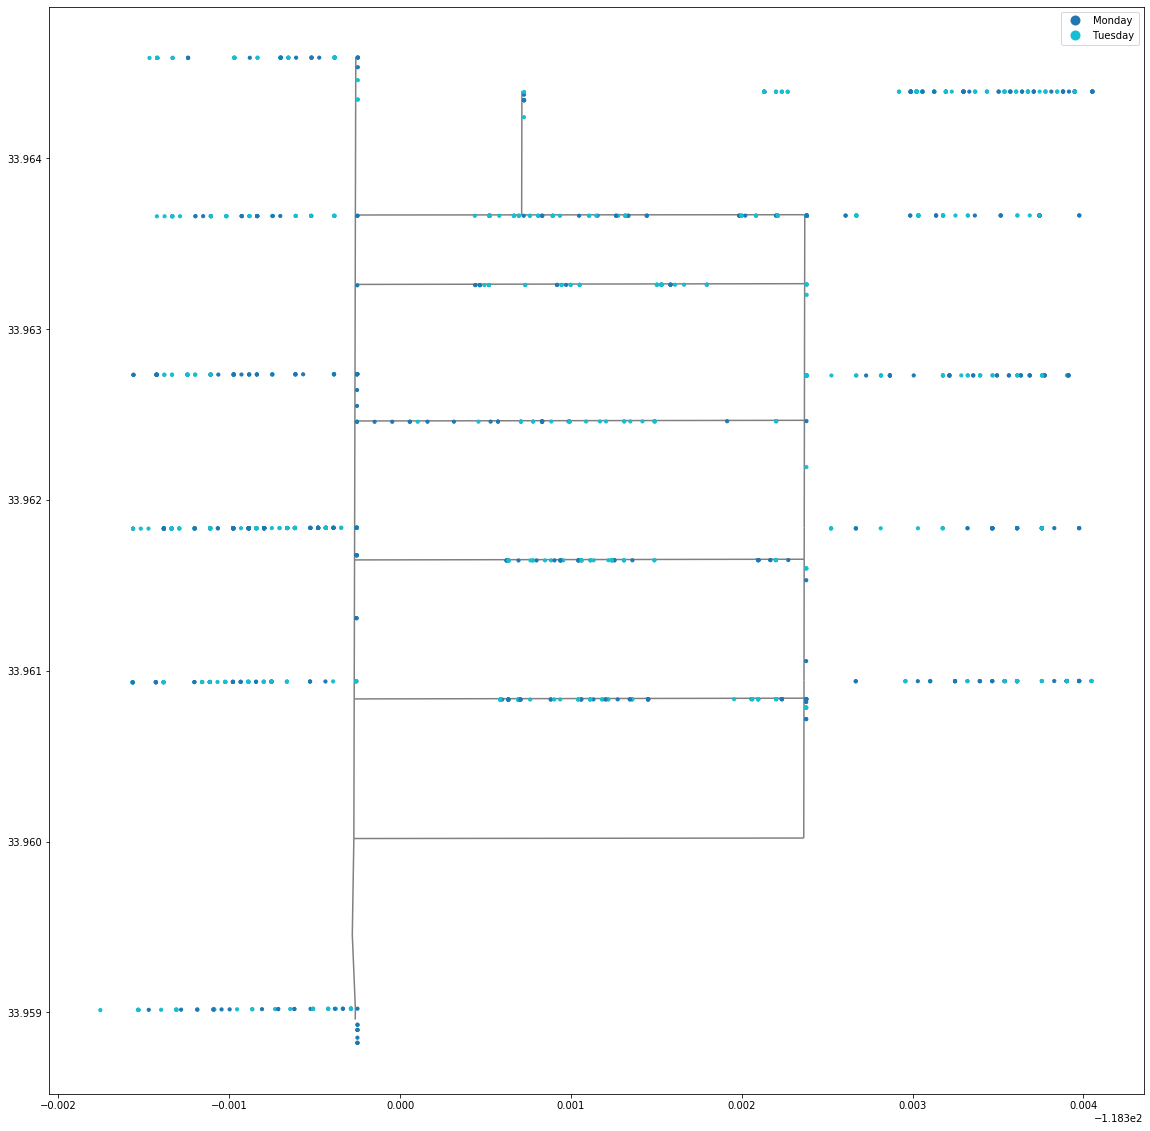

In [40]:
plot_points(33.96165, -118.29894, zoom= 0.003)

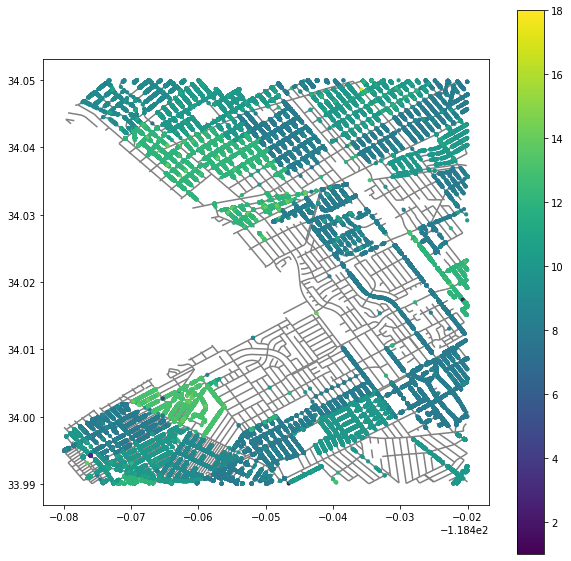

In [29]:
plot_points(34.02, -118.450, column='Hour', zoom=0.03, fsize=10)

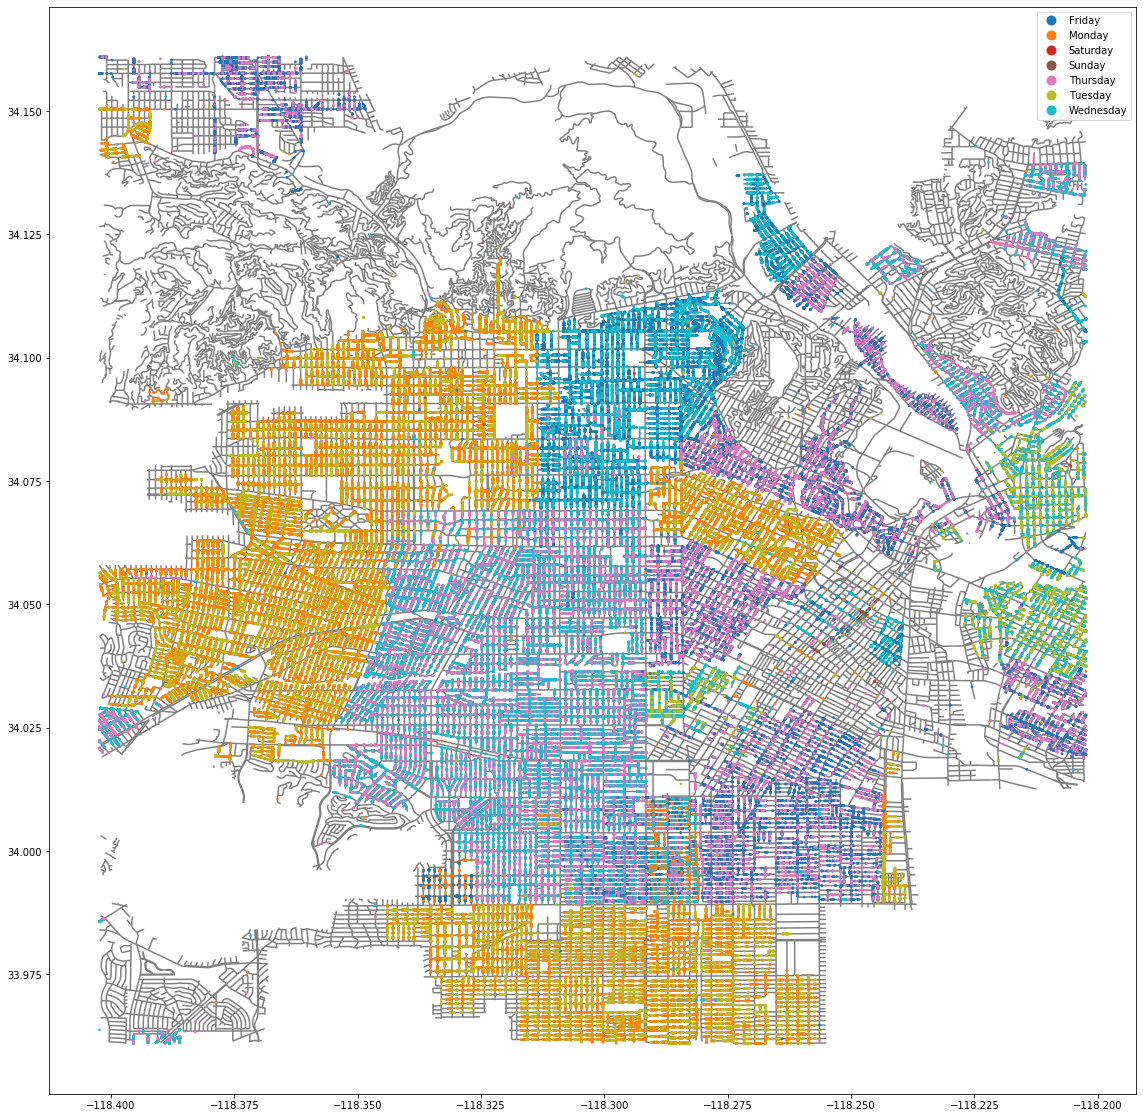

In [28]:
plot_points(34.060988, -118.302358, zoom=0.1, markersize=3)

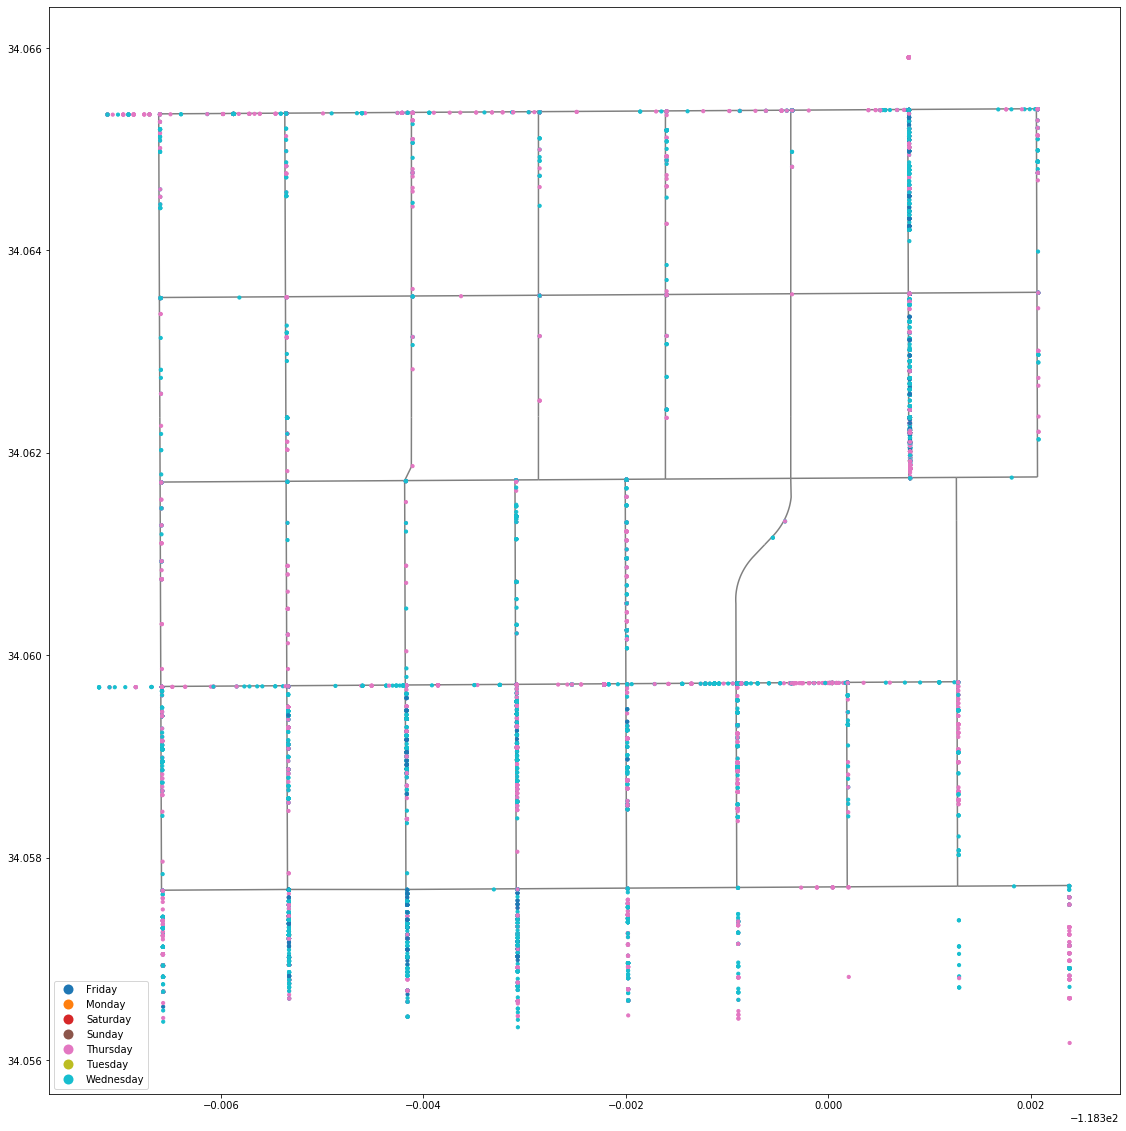

In [36]:
plot_points(34.060988, -118.302358, zoom=0.005)

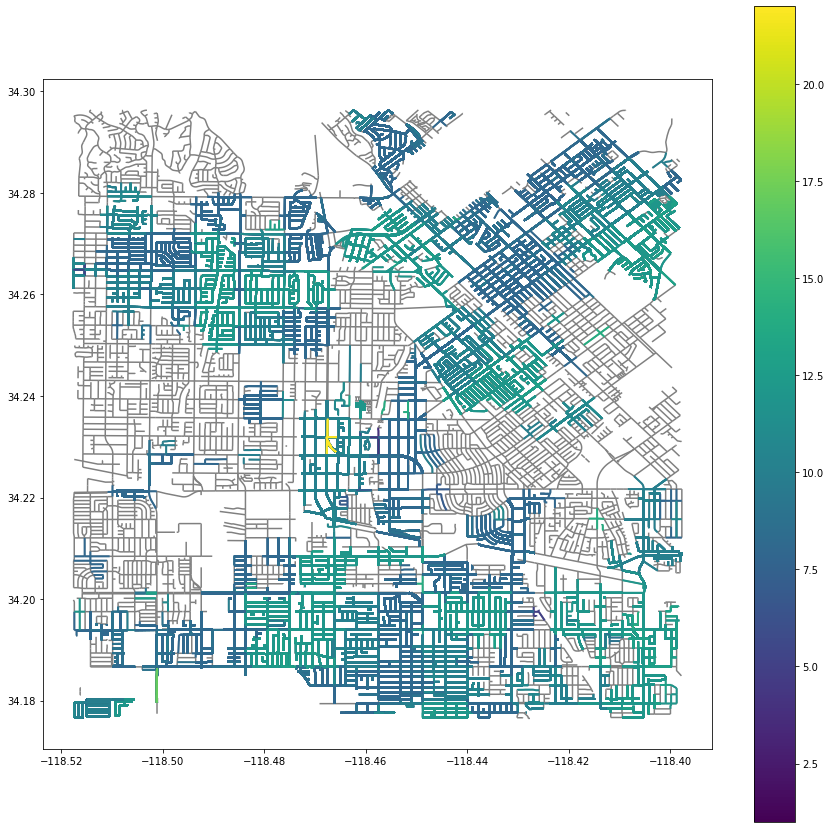

In [29]:
plot_streets(34.2364, -118.4577, fsize=15, column='Hour')

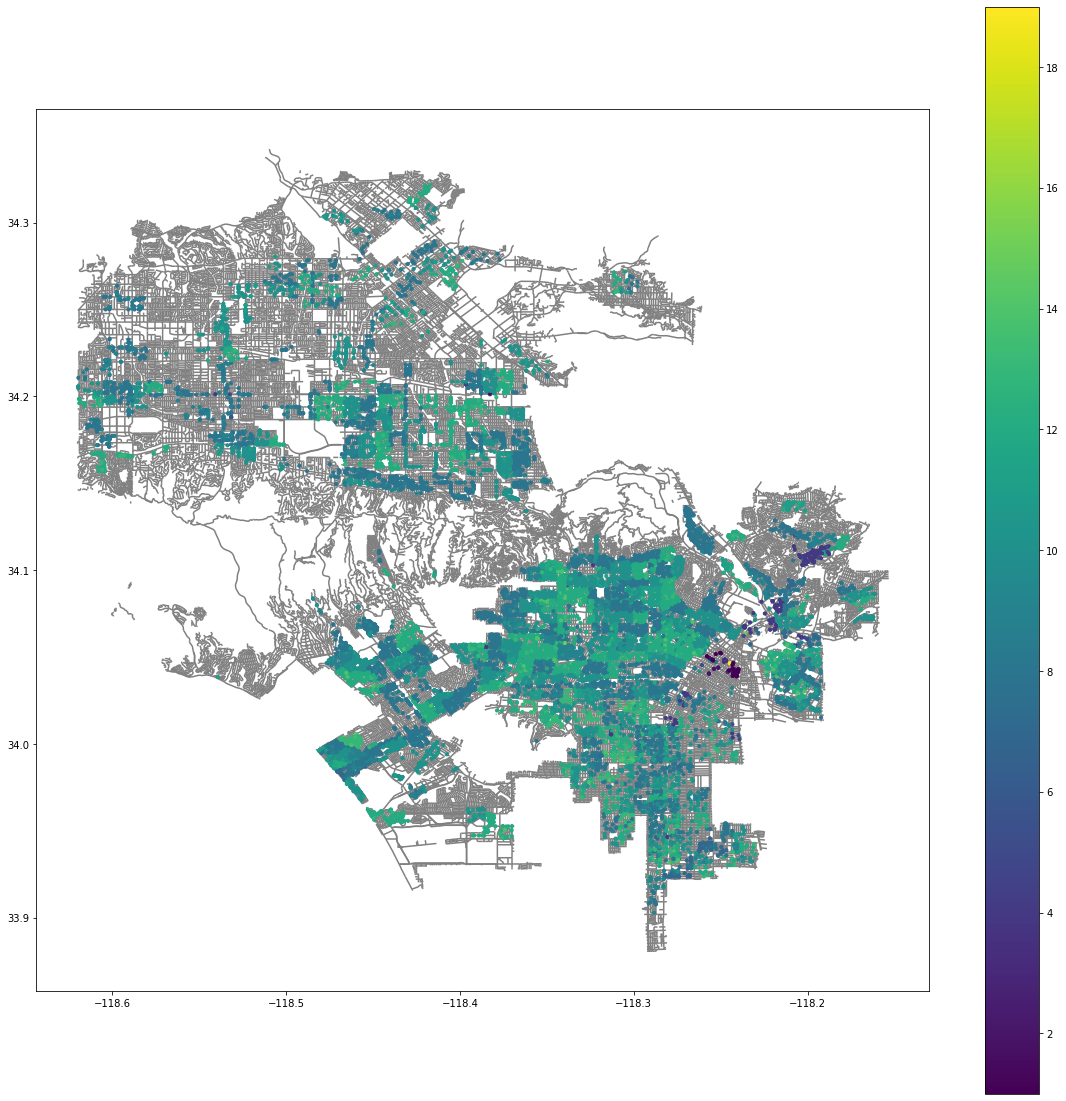

In [64]:
plot_points(34.18, -118.32, zoom=0.3, column='Hour', markersize=10)

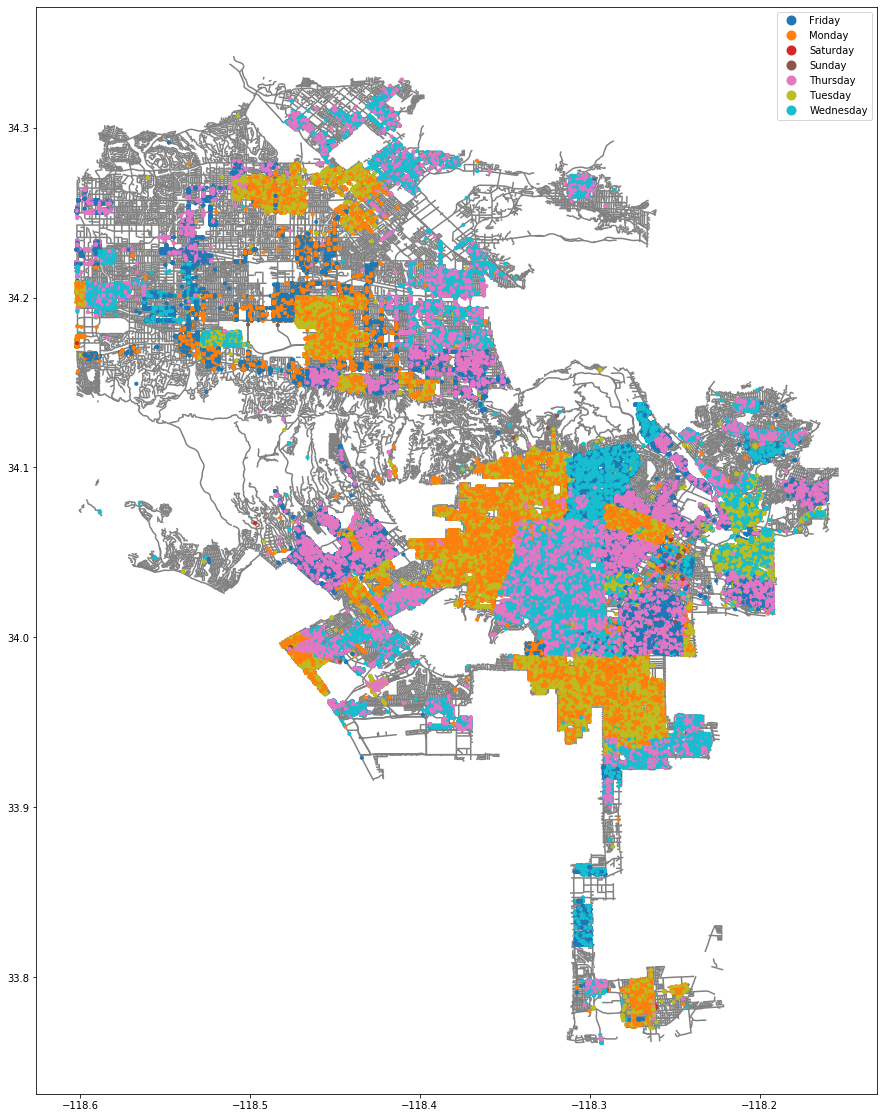

In [22]:
plot_points(34.060988, -118.302358, zoom=0.3)

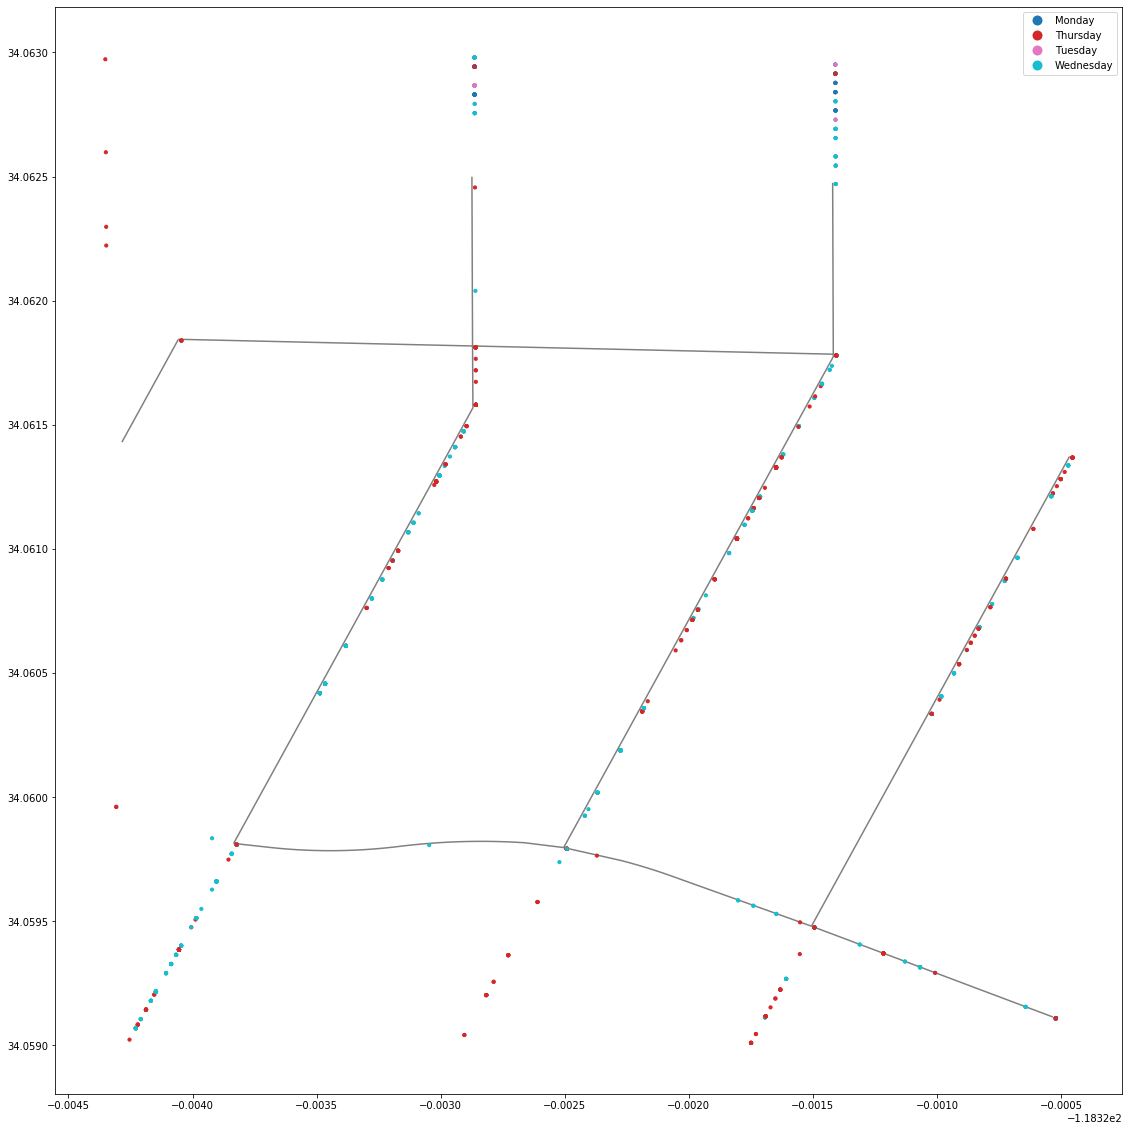

In [27]:
plot_points(34.060988, -118.322358, zoom=0.002)